In [14]:
import pandas as pd
import matplotlib.pyplot as plt
import plotly.express as px

#Cargamos nuestro archivo CSV previamente ya preparado para su analisis, donde lo cargamos con la libreria pandas y mostramos las primeras 5 filas
df = pd.read_csv('Final.csv')

#Eliminamos la categoria de id de las columnas, esta no es necesaria en general solo es 1 categoria y ya se tiene el nombre
#creamos un df de la correlacion unicamente de los valores numericos
df = df.drop(columns=['ID_CATEGORY'])
dfCorr = df.corr(numeric_only=True)

#De nuestro DF principal nos aseguramos que sea de tipo fecha
df['DATE'] = pd.to_datetime(df['DATE'])
df = df[df['BRAND'] == 'VANISH']

#En un DF nuevo Agrupamos por año y por el codigo del producto para poder ver la evolucion de ventas por año de cada producto
dfEvolutionProductYear = (df.groupby(['YEAR','ITEM_CODE'])[['TOTAL_UNIT_SALES','TOTAL_VALUE_SALES']].sum()
    .reset_index().sort_values(by=['ITEM_CODE','YEAR'], ascending = [True,True]))
dfEvolutionProductYear['TOTAL_UNIT_SALES'] = dfEvolutionProductYear['TOTAL_UNIT_SALES'].round(2)
dfEvolutionProductYear['TOTAL_VALUE_SALES'] = dfEvolutionProductYear['TOTAL_VALUE_SALES'].round(2)

dfEvolutionProductYear

,YEAR,ITEM_CODE,TOTAL_UNIT_SALES,TOTAL_VALUE_SALES
18,2022,7501058782694BP1,0.01,0.17
0,2021,7501058786548BP1,0.01,0.22
19,2022,7501058786548BP1,0.12,5.49
37,2023,7501058786548BP1,0.03,0.24
38,2023,7501058789778BP1,0.00,0.18
1,2021,7501058790415BP1,0.01,0.50
20,2022,7501058790415BP1,0.05,3.95
2,2021,7501058792778BP1,0.32,45.02
21,2022,7501058792778BP1,12.54,1721.93
39,2023,7501058792778BP1,54.60,6892.62


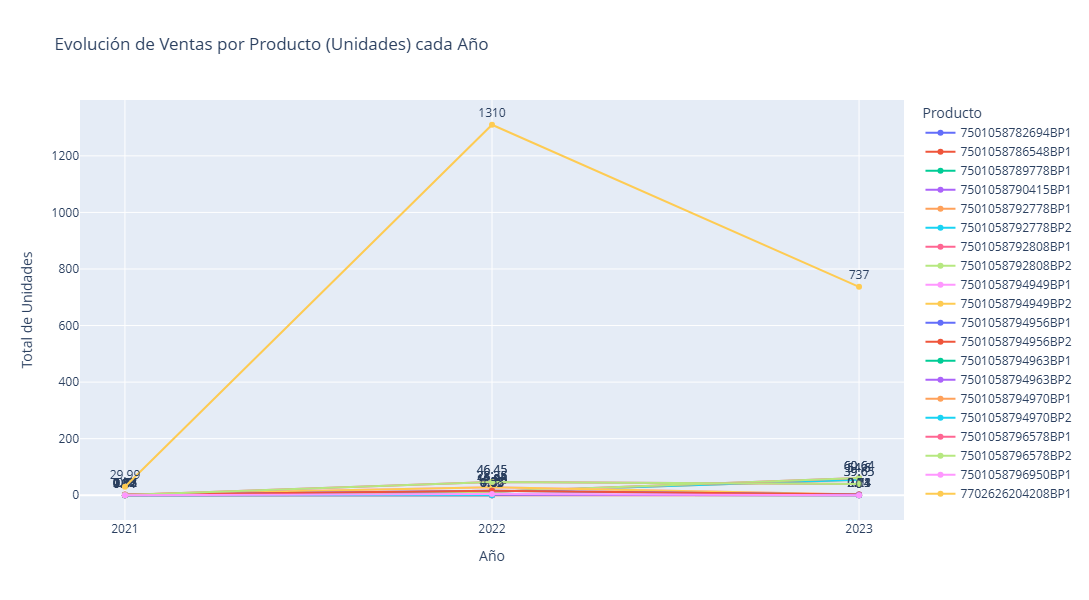

In [18]:
fig = px.line(
    dfEvolutionProductYear,
    x="YEAR",
    y="TOTAL_UNIT_SALES",
    color="ITEM_CODE",         
    markers=True,
    text="TOTAL_UNIT_SALES",
    title="Evolución de Ventas por Producto (Unidades) cada Año",
    labels={
        "YEAR": "Año",
        "TOTAL_UNIT_SALES": "Total de Unidades",
        "ITEM_CODE": "Producto"
    },
    height=600,
    width=1000
)
fig.update_traces(textposition="top center")
fig.update_xaxes(
    tickmode='linear',
    dtick=1,
    tickformat='d'
)
fig.show()

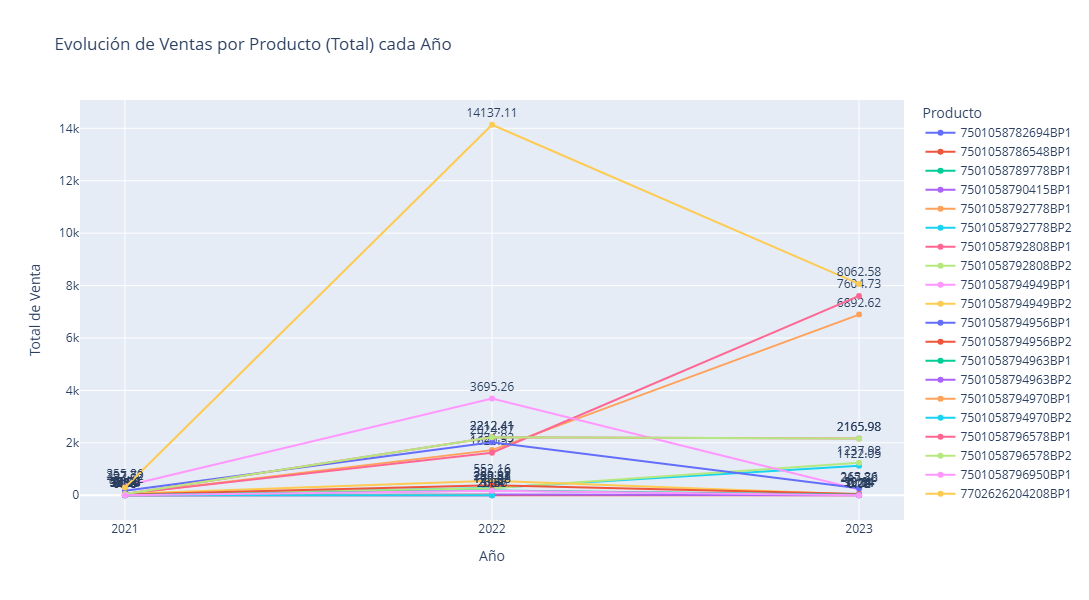

In [19]:
fig = px.line(
    dfEvolutionProductYear,
    x="YEAR",
    y="TOTAL_VALUE_SALES",
    color="ITEM_CODE",
    markers=True,
    text="TOTAL_VALUE_SALES",
    title="Evolución de Ventas por Producto (Total) cada Año",
    labels={
        "YEAR": "Año",
        "TOTAL_VALUE_SALES": "Total de Venta",
        "ITEM_CODE": "Producto"
    },
    height=600,
    width=1000
)
fig.update_traces(textposition="top center")
fig.update_xaxes(
    tickmode='linear',
    dtick=1,
    tickformat='d'
)
fig.show()